In [1]:
import numpy as np
import statsmodels.api as statm
import statsmodels.formula.api as statfa
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/Users/mega/anaconda3/envs/mddl/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
X = [i[0:2] for i in data]
Y = [i[2] for i in data]

In [3]:
X_1=statm.add_constant(X)
results=statm.OLS(Y,X_1).fit()

In [4]:
hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(Y)

In [5]:
model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

In [6]:
results_formula = model.fit()

In [7]:
a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

In [8]:
X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)


/Users/mega/anaconda3/envs/mddl/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


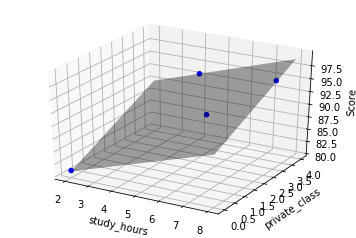

In [9]:
fig = plt.figure()

graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study_hours')
graph.set_ylabel('private_class')
graph.set_zlabel('Score')

plt.show()